In [1]:
from nltk import ngrams
import pandas as pd

In [2]:
# based on https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/

In [3]:
df = pd.read_csv(r"dataset\processed\processed_data_sentiment.csv")

In [4]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,id,edit_history_tweet_ids,created_at,text,author_id,Unnamed: 0,text_cleaned,text_cleaned_stemmed,mdhugol_sentiment,mdhugol_sentiment_score,indobert_sentiment,indobert_sentiment_score
0,0,0,1880655687866552831,1880655687866552831,2025-01-18T16:37:11.000Z,Ketua Umum PDIP Megawati Soekarnoputri sempat ...,917707622026928129,NaN,ketua umum pdip megawati soekarnoputri sempat ...,ketua umum pdip megawati soekarnoputri sempat ...,neutral,0.989232,Neutral,0.999553
1,1,1,1880655628819165446,1880655628819165446,2025-01-18T16:36:57.000Z,@HabilIsl Hold $WOWO dapat airdrop makan siang...,112500656,NaN,hold wowo dapat airdrop makansianggratis,hold wowo dapat airdrop makansianggratis,positive,0.912627,Neutral,0.999512
2,2,2,1880655540717842742,1880655540717842742,2025-01-18T16:36:36.000Z,KALAU MBG NYA INI GUE JUGA MAU DUT BIAR GUE MU...,1266052828742602752,NaN,kalau mbg nya ini gue juga mau dut biar gue mu...,kalau mbg nya ini gue juga mau dut biar gue mu...,negative,0.982285,Negative,0.999828
3,3,3,1880655480122651014,1880655480122651014,2025-01-18T16:36:22.000Z,@neohistoria_id program MBG tuh B nya Bersyuku...,1838116873331945472,NaN,program mbg tuh b nya bersyukur bukan bergizi,program mbg tuh b nya syukur bukan gizi,negative,0.985092,Negative,0.996238
4,4,4,1880655463207117137,1880655463207117137,2025-01-18T16:36:17.000Z,@03__nakula Ga semua anak Indonesia bisa makan...,1511016593353936896,NaN,enggak semua anak indonesia bisa makan siang ...,enggak semua anak indonesia bisa makan siang i...,negative,0.990175,Neutral,0.564391


## Filter Duplicate Tweets

In [5]:
df = df.drop_duplicates(subset=["text_cleaned_stemmed"]).reset_index(drop=True)

In [6]:
len(df)

375

## n_gram Analysis

In [7]:
#text = df.at[0,"text_cleaned"]

def generate_N_grams(text,ngram_n=1):
    words=[word for word in text.split(" ")]
    temp=zip(*[words[i:] for i in range(0,ngram_n)])
    ans=[' '.join(ngram) for ngram in temp]

    return ans

In [8]:
from collections import defaultdict

In [9]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)

In [10]:
len(df)

375

In [11]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,id,edit_history_tweet_ids,created_at,text,author_id,Unnamed: 0,text_cleaned,text_cleaned_stemmed,mdhugol_sentiment,mdhugol_sentiment_score,indobert_sentiment,indobert_sentiment_score
0,0,0,1880655687866552831,1880655687866552831,2025-01-18T16:37:11.000Z,Ketua Umum PDIP Megawati Soekarnoputri sempat ...,917707622026928129,NaN,ketua umum pdip megawati soekarnoputri sempat ...,ketua umum pdip megawati soekarnoputri sempat ...,neutral,0.989232,Neutral,0.999553
1,1,1,1880655628819165446,1880655628819165446,2025-01-18T16:36:57.000Z,@HabilIsl Hold $WOWO dapat airdrop makan siang...,112500656,NaN,hold wowo dapat airdrop makansianggratis,hold wowo dapat airdrop makansianggratis,positive,0.912627,Neutral,0.999512
2,2,2,1880655540717842742,1880655540717842742,2025-01-18T16:36:36.000Z,KALAU MBG NYA INI GUE JUGA MAU DUT BIAR GUE MU...,1266052828742602752,NaN,kalau mbg nya ini gue juga mau dut biar gue mu...,kalau mbg nya ini gue juga mau dut biar gue mu...,negative,0.982285,Negative,0.999828
3,3,3,1880655480122651014,1880655480122651014,2025-01-18T16:36:22.000Z,@neohistoria_id program MBG tuh B nya Bersyuku...,1838116873331945472,NaN,program mbg tuh b nya bersyukur bukan bergizi,program mbg tuh b nya syukur bukan gizi,negative,0.985092,Negative,0.996238
4,4,4,1880655463207117137,1880655463207117137,2025-01-18T16:36:17.000Z,@03__nakula Ga semua anak Indonesia bisa makan...,1511016593353936896,NaN,enggak semua anak indonesia bisa makan siang ...,enggak semua anak indonesia bisa makan siang i...,negative,0.990175,Neutral,0.564391


In [12]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)

In [13]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
posdict = {}

for idx, text in enumerate(df[df.mdhugol_sentiment=="positive"].text_cleaned_stemmed):
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1
    try:
      posdict[word].append(idx)
    except:
      posdict[word] = []
      posdict[word].append(idx)
    

In [14]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
posdict = {}

for idx, text in enumerate(df.text_cleaned_stemmed):
  if df.at[idx,"mdhugol_sentiment"]=="positive":
    for word in generate_N_grams(text,2):
        positiveValues2[word]+=1
        try:
            posdict[word].append(idx)
        except:
            posdict[word] = []
            posdict[word].append(idx)

In [15]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
negdict = {}

for idx, text in enumerate(df.text_cleaned_stemmed):
  if df.at[idx,"mdhugol_sentiment"]=="negative":
    for word in generate_N_grams(text,2):
        negativeValues2[word]+=1
        try:
            negdict[word].append(idx)
        except:
            negdict[word] = []
            negdict[word].append(idx)

In [16]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
neudict = {}

for idx, text in enumerate(df.text_cleaned_stemmed):
  if df.at[idx,"mdhugol_sentiment"]=="neutral":
    for word in generate_N_grams(text,2):
        neutralValues2[word]+=1
        try:
            neudict[word].append(idx)
        except:
            neudict[word] = []
            neudict[word].append(idx)

In [17]:
df_positive=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [18]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

In [19]:
from matplotlib import pyplot as plt

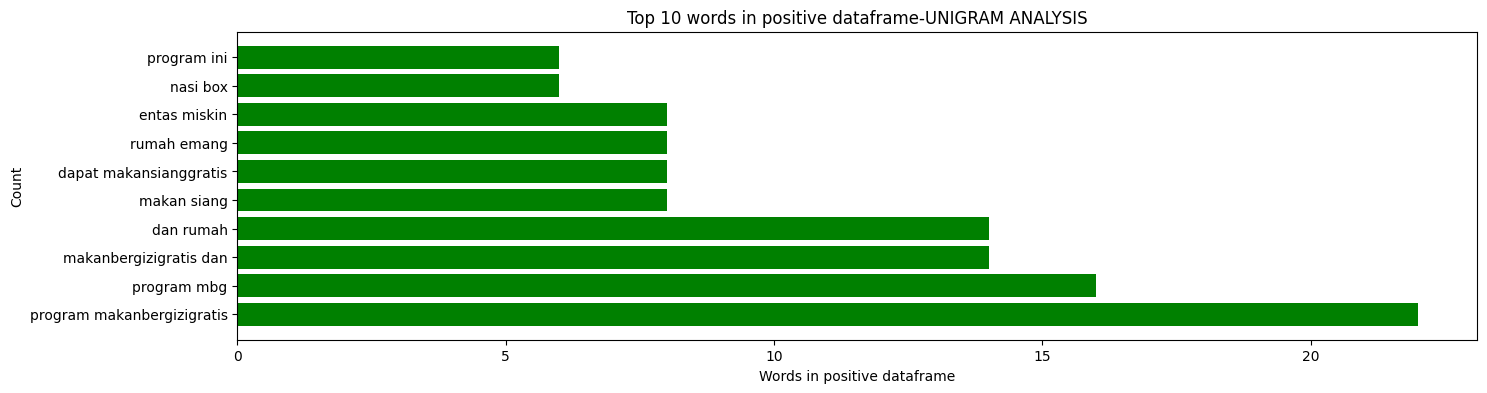

In [20]:
plt.figure(1,figsize=(16,4))
plt.barh(pd1,pd2, color ='green')
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
#plt.savefig("positive-unigram.png")
plt.show()

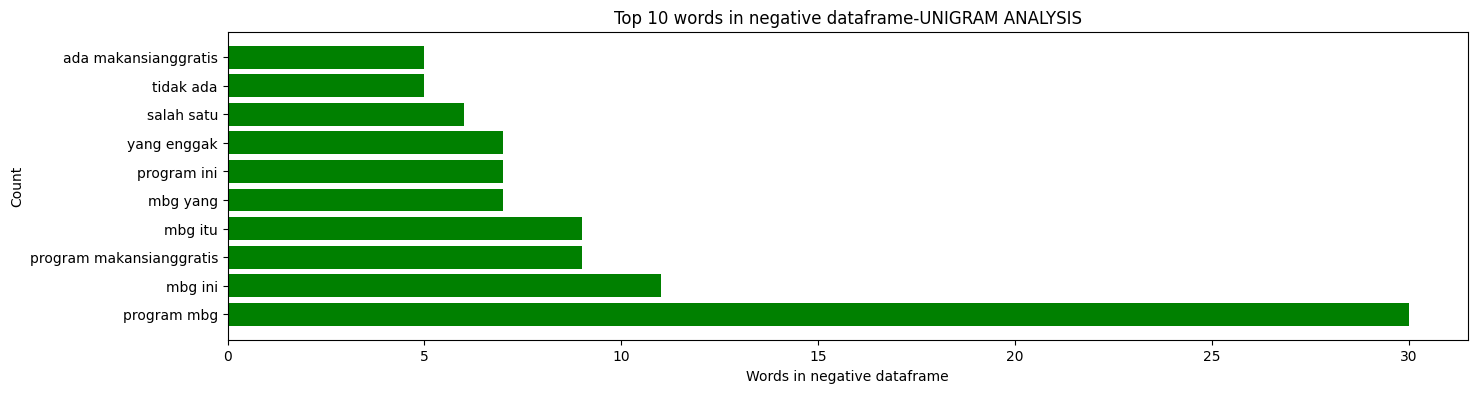

In [21]:
plt.figure(1,figsize=(16,4))
plt.barh(ned1,ned2, color ='green')
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
#plt.savefig("positive-unigram.png")
plt.show()

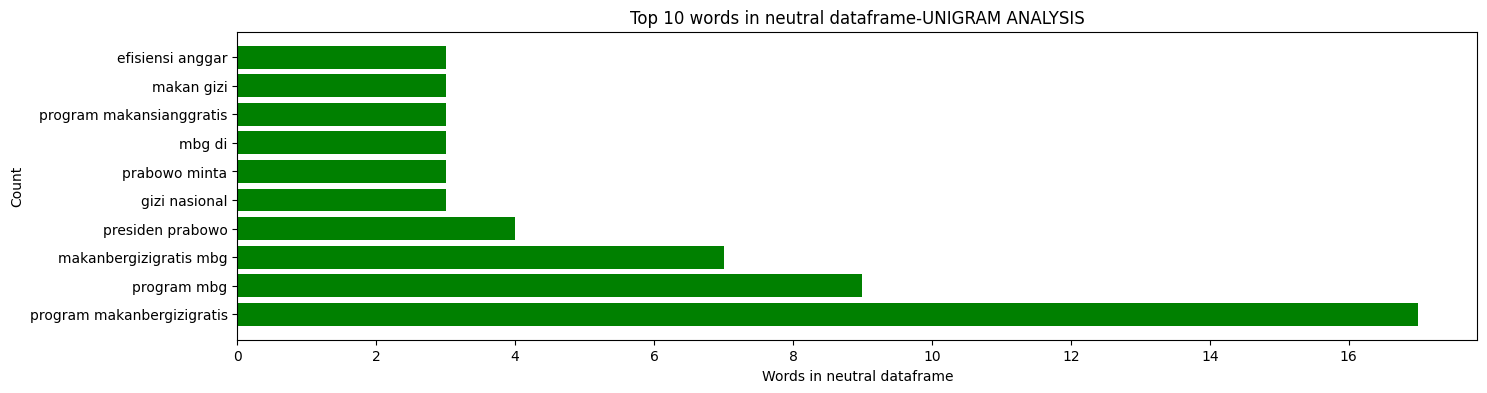

In [22]:
plt.figure(1,figsize=(16,4))
plt.barh(nud1,nud2, color ='green')
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
#plt.savefig("positive-unigram.png")
plt.show()

In [23]:
pd.DataFrame(positiveValues2,index=range(len(positiveValues2))).T[0].to_csv(r"dataset\bigram\posvaluesbigram.csv")
pd.DataFrame(negativeValues2,index=range(len(negativeValues2))).T[0].to_csv(r"dataset\bigram\negvaluesbigram.csv")
pd.DataFrame(neutralValues2,index=range(len(negativeValues2))).T[0].to_csv(r"dataset\bigram\neuvaluesbigram.csv")

In [30]:
for i in negdict["yang enggak"]:
    print("{} {}".format(df.at[i,"id"], df.at[i,"text"]))

1880652081398480992 Kalau mau lihat siapa yang paling untung dari program ini, lihat yang ga kritik atau ngatain ini. Siapapun yang masih klarifikasi atau ngatain ini, dia masih di spektrum tengah dalam isu MBG ini.
1880648980687921385 baru inget sama si cep arnold, dia kan pas itu belain pemerintah yak. apa nih tanggapan dia soal MBG yg gak enak, ayamnya keras, hambar, sampe bikin keracunan. kok diem aja sekarang padahal ini masih bidangnya dia? biasanya galak tuh komentarnya https://t.co/fWJ1Jmtq1c
1880645615333625952 @RickyKardjono Ya duit pegawe pemda disunat buat boreki MBG tapi yg gak gratis itu
1882458403223814404 @BANGSAygSUJUD @prabowo @99propaganda @are_inismyname @DarekaRendy @florieliciouss @hasanudinsajid @Kimberley_PS08 @Ndons_Back @SingaPatriot @mpoklela7 @bitCarli77 TERNYATA, KEMISKINAN ITU MEMANG GAK BISA DIBERANTAS, ATAU MEMANG PEMERINTAH YG GAK MAMPU BERANTAS. PROGRAM MBG CUMA PELIPUR LARA BAGI RAKYAT MISKIN, PADAHAL PENDAPATAN MEREKA MAKIN TERGERUS DENGAN KENAIKAN P